In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import ldspec
import zipfile
import pickle 
from adjustText import adjust_text

# from venny4py.venny4py import *

# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp'
FIG_PATH = '/n/groups/price/martin/LDSPEC_data/results/fig_res.rv1'
TAB_PATH = '/n/groups/price/martin/LDSPEC_data/results/tables.rv1'

# DF_TRAIT, DF_ANNOT, DF_PANNOT
DF_TRAIT = pd.read_csv('/n/groups/price/martin/LDSPEC_data/results/tables/trait_info.rv1.tsv', sep='\t')
DF_TRAIT.index = DF_TRAIT['Trait_Identifier']
TRAIT_LIST = list(DF_TRAIT.index)
TRAIT_LIST_INDPT = list(DF_TRAIT.index[DF_TRAIT['Indpt']])
print("n_trait=%d" % DF_TRAIT.shape[0])
print("n_trait_indpt=%d" % len(TRAIT_LIST_INDPT))

DF_ANNOT = pd.read_csv('/n/groups/price/martin/LDSPEC_data/results/tables/annot_info.tsv', sep='\t')
DF_ANNOT.index = DF_ANNOT['Identifier']
print("n_annot=%d" % DF_ANNOT.shape[0])

DF_PANNOT = pd.read_csv('/n/groups/price/martin/LDSPEC_data/results/tables/pannot_info.tsv', sep='\t')
DF_PANNOT.index = DF_PANNOT['Identifier']
print("n_pannot=%d" % DF_PANNOT.shape[0])

# Others
temp_df = pd.read_csv('../names.txt', sep='\t', header=None)
DIC_NAME = {x:y for x,y in zip(temp_df[0], temp_df[1])}
DIC_COLOR = {
    'common' : '#78ADD2', 
    'lf' : '#FFB26E',
    ('p0_p100', 'common') : 'C0',
    ('p0_p100', 'lf') : 'C1',
    ('n100_p0', 'common') : 'C2',
    ('n100_p0', 'lf') : 'C3',
}

MARKER_LIST=['o', 'v', '^', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', '<', '>']

n_trait=70
n_trait_indpt=29
n_annot=45
n_pannot=34


In [3]:
DATA_PATH = "/n/groups/price/martin/LDSPEC_data/"
sumstats_file = '/n/groups/price/martin/LDSPEC_data/UKBimp_ss50K_MAF001_chimp/sumstats/@.sumstats.gz'
sumstats_full_file = '/n/groups/price/martin/LDSPEC_data/UKBimp_rep287K_MAF001_chimp/sumstats/@.nomhc.sumstats.gz'
trait_list = pd.read_csv(
    '/n/groups/price/martin/LDSPEC_data/UKBB_trait_ss50K/trait_list_all_indpt.txt', header=None,
)[0].to_list()

# # genotype files
# pgen_file = '/n/scratch/users/j/jz286/imp_geno_ss50K_chimp/ukb_imp_chr@_v3_chimp'
# dic_data = {}
# for CHR in range(1, 23):  # Check all 23 CHRs
#     if os.path.exists(pgen_file.replace("@", "%s" % CHR) + ".pgen"):
#         dic_data[CHR] = ldspec.util.read_pgen(
#             pgen_file.replace("@", "%s" % CHR)
#         )
# ld_file = '/n/scratch/users/j/jz286/imp_geno_ss50K_chimp.ldspec_ld_1e6/ukb_imp_v3_chimp.@_ld.npz'
snp_range_list = pd.read_csv(
    '/n/groups/price/martin/LDSPEC_data/UKBimp_ss50K_MAF001_chimp/ukb_imp_v3.snp_range.txt', header=None,
)[0].to_list()

# pairwise results 
rho_r_ratio_list = [-1, 0, 1]
pairwise_file = '/n/groups/price/martin/LDSPEC_data/rv1_assoc/jnt_test_120724/UKBimp_ss50K_MAF001_chimp.@t.@r.tsv'

In [4]:
annot_file = '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001/baseline_annot/'\
    'baseline_165annots_chr@.annot.gz'
df_annot = []
for CHR in range(1, 23):  # Check all 23 CHRs
    df_annot.append(ldspec.util.read_annot(annot_file.replace('@','%d'%CHR)))
df_annot = pd.concat(df_annot, axis=0)
df_annot.index = df_annot['SNP']

In [5]:
# # df_snp
# CHR_LIST = np.arange(1,23)
# df_snp = []
# for CHR in CHR_LIST:
#     df_snp_chr = dic_data[CHR]['pvar'].copy()
#     df_snp_chr.index = df_snp_chr['SNP']
#     temp_dic = {x:y for x,y in zip(dic_data[CHR]['afreq']['SNP'],dic_data[CHR]['afreq']['MAF'])}
#     df_snp_chr['AF'] = [temp_dic[x] if x in temp_dic else 0 for x in df_snp_chr['SNP']]
#     # Add SNP range    
#     df_snp_chr['idx'] = np.arange(df_snp_chr.shape[0])
#     df_snp_chr['idx_range'] = np.arange(df_snp_chr.shape[0])
#     df_snp_chr['range'] = ''
#     for temp_range in snp_range_list:
#         if temp_range.startswith('c%d'%CHR):
#             temp_dic = ldspec.util.parse_snp_range(temp_range)
#             ind_select = np.zeros(df_snp_chr.shape[0], dtype=bool)
#             ind_select[temp_dic['start']:temp_dic['end']] = True
#             df_snp_chr.loc[ind_select, 'range'] = temp_range
#             df_snp_chr.loc[ind_select, 'idx_range'] -= temp_dic['start']
            
#     df_snp.append(df_snp_chr)
# df_snp = pd.concat(df_snp, axis=0)

In [6]:
# # preparation
# dic_chr = {x:y for x,y in zip(df_snp['SNP'], df_snp['CHR'])}
# dic_bp = {x:y for x,y in zip(df_snp['SNP'], df_snp['BP'])}
# dic_af = {x:y for x,y in zip(df_snp['SNP'], df_snp['AF'])}

# # read results 
# dic_res = {}
# for trait in trait_list:
#     print(trait)
#     # df_sumstats = pd.read_csv(sumstats_file.replace('@', trait), sep="\t", index_col=None) 
#     df_sumstats_full = pd.read_csv(sumstats_full_file.replace('@', trait), sep="\t", index_col=None)
#     # results for pairwise tests 
#     dic_res[trait] = {}
#     for rho_r_ratio in rho_r_ratio_list:
#         res_file = pairwise_file.replace('@t', trait).replace('@r', '%0.1f'%rho_r_ratio)
#         dic_res[trait][rho_r_ratio] = pd.read_csv(res_file, sep='\t')
        
#     # Aggregate results for analysis 
#     temp_df = dic_res[trait][0][['SNP1', 'SNP2', 'LD', 'N', 'P1', 'P2', 'Z1', 'Z2']].copy()
#     # add CHR,BP,AF
#     temp_df['CHR'] = [dic_chr[x] for x in temp_df['SNP1']]
#     temp_df['BP1'] = [dic_bp[x] for x in temp_df['SNP1']]
#     temp_df['BP2'] = [dic_bp[x] for x in temp_df['SNP2']]
#     temp_df['AF1'] = [dic_af[x] for x in temp_df['SNP1']]
#     temp_df['AF2'] = [dic_af[x] for x in temp_df['SNP2']]
#     # filter to those overlapping with full sumstats
#     temp_set = set(df_sumstats_full['SNP'])
#     print('SNP1: %d/%d missing (%d in CHR6), SNP2: %d/%d missing (%d in CHR6)' % (
#         len(set(temp_df['SNP1']) - temp_set), len(set(temp_df['SNP1'])), 
#         len(set(temp_df.loc[temp_df['CHR']==6,'SNP1']) - temp_set),
#         len(set(temp_df['SNP2']) - temp_set), len(set(temp_df['SNP2'])), 
#         len(set(temp_df.loc[temp_df['CHR']==6,'SNP2']) - temp_set),
#     ))
#     temp_df = temp_df.loc[temp_df['SNP1'].isin(temp_set) & temp_df['SNP2'].isin(temp_set)].copy()
#     print('filter, %d/%d pairs remaining' % (temp_df.shape[0], dic_res[trait][0].shape[0]))
#     # add sumstats_full
#     temp_dic = {x:y for x,y in zip(df_sumstats_full['SNP'],df_sumstats_full['Z'])}
#     temp_df['Z1_full'] = [temp_dic[x] for x in temp_df['SNP1']]
#     temp_df['P1_full'] = ldspec.util.zsc2pval(temp_df['Z1_full'])
#     temp_df['Z2_full'] = [temp_dic[x] for x in temp_df['SNP2']]
#     temp_df['P2_full'] = ldspec.util.zsc2pval(temp_df['Z2_full'])
#     temp_df = temp_df[[
#         'SNP1', 'SNP2', 'LD', 'N', 'CHR', 'BP1', 'BP2', 'AF1', 'AF2',
#         'Z1', 'Z2', 'P1', 'P2', 'Z1_full', 'Z2_full', 'P1_full', 'P2_full']
#     ].copy()
#     # Joint testing results
#     for rho_r_ratio in rho_r_ratio_list: 
#         temp_dic = {
#             (x,y):[z1,z2] for x,y,z1,z2 in zip(
#                 dic_res[trait][rho_r_ratio]["SNP1"], 
#                 dic_res[trait][rho_r_ratio]["SNP2"], 
#                 dic_res[trait][rho_r_ratio]["lrt"],
#                 dic_res[trait][rho_r_ratio]["P"])
#         }
#         temp_df['lrt%0.1f'%rho_r_ratio] = [temp_dic[(x,y)][0] for x,y in zip(temp_df['SNP1'],temp_df['SNP2'])]
#         temp_df['P%0.1f'%rho_r_ratio] = [temp_dic[(x,y)][1] for x,y in zip(temp_df['SNP1'],temp_df['SNP2'])]
#     dic_res[trait]['stats'] = temp_df.copy()
    
    
# # pickle the files
# with open('/n/groups/price/martin/LDSPEC_data/rv1_assoc/dic_res.jnt_test_120724.pickle', 'wb') as f:
#     pickle.dump(dic_res, f)

In [7]:
# with open('/n/groups/price/martin/LDSPEC_data/rv1_assoc/dic_res.pickle', 'rb') as f:
#     dic_res = pickle.load(f)
# Test pairs with P1<5e-4, P2<5e-2, dist<10kb, 0.05<abs(LD)<0.95
with open('/n/groups/price/martin/LDSPEC_data/rv1_assoc/dic_res.jnt_test_120724.pickle', 'rb') as f:
    dic_res = pickle.load(f)
print(dic_res[TRAIT_LIST[2]][-1]['P1'].max(), dic_res[TRAIT_LIST[2]][-1]['P2'].max())

0.0004998992 0.049992997000000004


### Overall associations

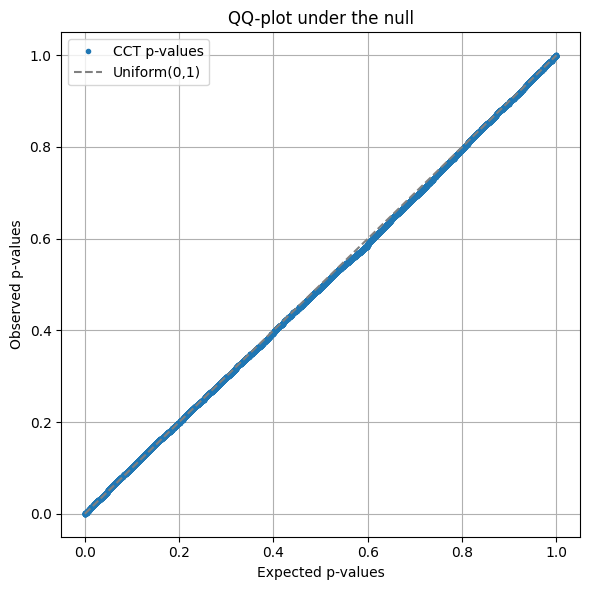

In [8]:
def cauchy_combination_test(pvals, axis=0):
    """
    Perform the Cauchy combination test on a matrix or vector of p-values.

    Parameters:
        pvals (array-like): Array or matrix of p-values, each in (0, 1).
        axis (int): Axis along which to apply the combination test.
                    For 2D: axis=0 combines columns (per row), axis=1 combines rows (per column).

    Returns:
        np.ndarray or float: Combined p-values along the specified axis.
    """
    pvals = np.asarray(pvals)
    
    if np.any(pvals <= 0) or np.any(pvals >= 1):
        raise ValueError("All p-values must be in the open interval (0, 1).")

    n = pvals.shape[axis]
    weights = np.full(n, 1.0 / n)

    tan_components = np.tan((0.5 - pvals) * np.pi)
    T = np.sum(tan_components * np.expand_dims(weights, axis=(1-axis)), axis=axis)
    p_combined = 0.5 - np.arctan(T) / np.pi

    return p_combined

# ----------------------------
# Null simulation parameters
# ----------------------------
n_sim = 10000         # Number of simulations
n_pvals = 10          # Number of p-values in each combination

# Simulate uniform p-values under the null
np.random.seed(42)
simulated_pvals = np.random.uniform(low=1e-10, high=1-1e-10, size=(n_sim, n_pvals))

# Apply the Cauchy combination test along axis=1 (each row is a test)
combined_pvals = cauchy_combination_test(simulated_pvals, axis=1)

# ----------------------------
# Plot QQ-plot vs uniform
# ----------------------------
expected = np.linspace(0, 1, n_sim, endpoint=False) + 0.5 / n_sim
observed = np.sort(combined_pvals)

plt.figure(figsize=(6, 6))
plt.plot(expected, observed, marker='.', linestyle='', label='CCT p-values')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Uniform(0,1)')
plt.xlabel('Expected p-values')
plt.ylabel('Observed p-values')
plt.title('QQ-plot under the null')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Assess replication; keep all processed results in dic_analysis
# Adjust `p_thres_jnt` such as n_non_rep is the same  
locus_gap = 1e5 # locus: <100kb
p_thres = 5e-8
md_list = ['P-1.0', 'P-0.5', 'P0.0', 'P0.5', 'P1.0']
md_tar = 'P0.0'
md_ref = 'P_min'

dic_analysis = {}
for trait in TRAIT_LIST_INDPT:
    dic_analysis[trait] = {}
    # temp_df across pairs
    temp_df = dic_res[trait]['stats'].copy()
    temp_df['BP_min'] = temp_df[['BP1', 'BP2']].min(axis=1)
    temp_df['BP_max'] = temp_df[['BP1', 'BP2']].max(axis=1)
    temp_df = temp_df.sort_values(['CHR', 'BP_min', 'BP_max'])
    temp_df.index = np.arange(temp_df.shape[0])    
    # assign locus
    i_locus = -1
    v_locus = []
    CHR_old,BP_min_old,BP_max_old = 0,0,0
    for CHR,BP_min,BP_max in zip(temp_df['CHR'],temp_df['BP_min'],temp_df['BP_max']):
        if CHR>CHR_old:
            i_locus += 1
        elif BP_min > BP_min_old + locus_gap:
            i_locus += 1
        CHR_old,BP_min_old,BP_max_old = CHR,BP_min,BP_max    
        v_locus.append(i_locus)
    temp_df['locus'] = v_locus
    dic_analysis[trait]['pair'] = temp_df.copy()

    # temp_df_locus: min P from each method
    temp_df_locus = temp_df.groupby('locus').agg({
        'P1':np.min, 'P2':np.min, 
        'BP1':np.min, 'BP2':np.max, 'CHR':'first',
        'P1_full':np.min, 'P2_full':np.min,
        'P-1.0':np.min, 'P-0.5':np.min, 'P0.0':np.min, 'P0.5':np.min, 'P1.0':np.min,
        'lrt-1.0':np.max, 'lrt-0.5':np.max, 'lrt0.0':np.max, 'lrt0.5':np.max, 'lrt1.0':np.max,
    })
    temp_df_locus['locus'] = temp_df_locus.index
    
    # discovery and replication
    temp_df_locus['P_min'] = temp_df_locus[['P1', 'P2']].min(axis=1)
    temp_df_locus['P_min.sig'] = temp_df_locus['P_min'] < p_thres
    temp_df_locus['P_full_min'] = temp_df_locus[['P1_full', 'P1_full']].min(axis=1)
    temp_df_locus['nonrep'] = temp_df_locus['P_full_min'] > p_thres
    
    # combined test
    temp_df_locus['P_combine'] = cauchy_combination_test(
        temp_df_locus[['P-1.0', 'P0.0', 'P1.0']].clip(lower=1e-100), axis=1)
    temp_df_locus['P_combine_full'] = cauchy_combination_test(
        temp_df_locus[['P-1.0', 'P-0.5', 'P0.0', 'P0.5', 'P1.0']].clip(lower=1e-100), axis=1)
    
    # best prior for each locus
    temp_list = ['lrt-1.0', 'lrt0.0', 'lrt1.0']
    temp_df_locus['argmax_lrt'] = temp_df_locus[temp_list].idxmax(axis=1)
    temp_df_locus['argmin_P'] = [x.replace('lrt', 'P') for x in temp_df_locus['argmax_lrt']]
    
    # best prior for each locus for P_combine_full
    temp_list = ['lrt-1.0', 'lrt-0.5', 'lrt0.0', 'lrt0.5', 'lrt1.0']
    temp_df_locus['argmax_lrt_full'] = temp_df_locus[temp_list].idxmax(axis=1)
    temp_df_locus['argmin_P_full'] = [x.replace('lrt', 'P') for x in temp_df_locus['argmax_lrt_full']]
    
    dic_analysis[trait]['locus'] = temp_df_locus.copy()

# determine joint test threshold
n_nonrep = 0 # marginal non-replication 
dic_p_thres_jnt = {}
for trait in TRAIT_LIST_INDPT:
    temp_df = dic_analysis[trait]['locus']
    n_nonrep += (temp_df['P_min.sig'] & temp_df['nonrep']).sum()
print('n_nonrep', n_nonrep)
        
for md in md_list+['P_combine', 'P_combine_full']:
    n_nonrep_jnt = 1e6
    p_thres_jnt = 1e-7
    while (n_nonrep_jnt > n_nonrep):
        n_nonrep_jnt = 0
        n_rep_jnt = 0
        p_thres_jnt /= 1.005
        for trait in TRAIT_LIST_INDPT:
            temp_df = dic_analysis[trait]['locus']
            n_nonrep_jnt += ((temp_df[md]<p_thres_jnt) & temp_df['nonrep']).sum()
            n_rep_jnt += ((temp_df[md]<p_thres_jnt) & (~temp_df['nonrep'])).sum()        
    print('p_thres_jnt', md, n_nonrep_jnt, n_rep_jnt, p_thres_jnt)  
    
    # final summary 
    dic_p_thres_jnt[md] = p_thres_jnt
    n_nonrep_jnt = 0
    n_rep_jnt = 0
    for trait in TRAIT_LIST_INDPT:
        dic_analysis[trait]['locus']['%s.sig'%md] = dic_analysis[trait]['locus'][md] < p_thres_jnt
        temp_df = dic_analysis[trait]['locus']
        n_nonrep_jnt += ((temp_df[md]<p_thres_jnt) & temp_df['nonrep']).sum()
        n_rep_jnt += ((temp_df[md]<p_thres_jnt) & (~temp_df['nonrep'])).sum()
    print('final p_thres_jnt', md, n_nonrep_jnt, n_rep_jnt, p_thres_jnt)  
    print('')

n_nonrep 28
p_thres_jnt P-1.0 28 704 3.5260875629900025e-08
final p_thres_jnt P-1.0 28 704 3.5260875629900025e-08

p_thres_jnt P-0.5 28 705 3.561436590808976e-08
final p_thres_jnt P-0.5 28 705 3.561436590808976e-08

p_thres_jnt P0.0 27 708 3.7435689283178455e-08
final p_thres_jnt P0.0 27 708 3.7435689283178455e-08

p_thres_jnt P0.5 27 712 3.954690615303896e-08
final p_thres_jnt P0.5 27 712 3.954690615303896e-08

p_thres_jnt P1.0 28 712 3.876575674747047e-08
final p_thres_jnt P1.0 28 712 3.876575674747047e-08

p_thres_jnt P_combine 28 708 3.651367327663258e-08
final p_thres_jnt P_combine 28 708 3.651367327663258e-08

p_thres_jnt P_combine_full 28 708 3.669624164301574e-08
final p_thres_jnt P_combine_full 28 708 3.669624164301574e-08



In [10]:
# grab locus 
df_assoc_locus = []
for trait in TRAIT_LIST_INDPT:
    temp_df = dic_analysis[trait]['locus'].copy()
    temp_df.index = ['%s.%s' % (trait,y) for y in temp_df['locus']]
    df_assoc_locus.append(temp_df.copy())
df_assoc_locus = pd.concat(df_assoc_locus, axis=0)

# comparison between P_combine and P_combine_full
print('P_combine', df_assoc_locus['P_combine.sig'].sum())
print('P_combine_full', df_assoc_locus['P_combine_full.sig'].sum())
print('Shared', (df_assoc_locus['P_combine.sig'] & df_assoc_locus['P_combine_full.sig']).sum())
print()

# best prior of pw sig loci
print('best prior using argmin_P')
print(df_assoc_locus.loc[df_assoc_locus['P_combine.sig'], 'argmin_P'].value_counts())
print('best prior using argmin_P_full')
print(df_assoc_locus.loc[df_assoc_locus['P_combine.sig'], 'argmin_P_full'].value_counts())
print()

# Supp table
print('Supp Table')
df_tbl = df_assoc_locus[['CHR', 'BP1', 'BP2', 'P_min.sig', 'P_combine.sig', 'argmin_P']]
df_tbl = df_tbl.loc[df_tbl['P_combine.sig'] | df_tbl['P_min.sig']]
df_tbl['Trait'] = [DIC_NAME[x.split('.')[0]] for x in df_tbl.index] 
temp_dic = {'P-1.0':'masking', 'P0.0':'indpt', 'P1.0':'amplifying'}
df_tbl.columns=['CHR', 'START', 'END', 'Marginal', 'Pairwise', 'Prior', 'Trait']
df_tbl['Prior'] = [temp_dic[x] for x in df_tbl['Prior']]
df_tbl = df_tbl[[ 'Trait', 'CHR', 'START', 'END', 'Marginal', 'Pairwise', 'Prior']]
df_tbl.to_csv(TAB_PATH+'/pw.summary.tsv', sep='\t')

P_combine 736
P_combine_full 736
Shared 736

best prior using argmin_P
P1.0     486
P-1.0    246
P0.0       4
Name: argmin_P, dtype: int64
best prior using argmin_P_full
P1.0     482
P-1.0    239
P-0.5     10
P0.5       4
P0.0       1
Name: argmin_P_full, dtype: int64

Supp Table


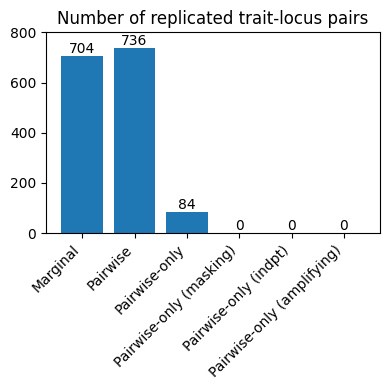

In [11]:
df_plot = pd.DataFrame(columns=['N'])
df_plot.loc['Marginal', 'N'] = df_tbl['Marginal'].sum()
df_plot.loc['Pairwise', 'N'] = df_tbl['Pairwise'].sum()
df_plot.loc['Pairwise-only', 'N'] = (df_tbl['Pairwise'] & (~df_tbl['Marginal'])).sum()
df_plot.loc['Pairwise-only (masking)', 'N'] = (
    df_tbl['Pairwise'] & (~df_tbl['Marginal']) & (df_tbl['Prior']=='P-1.0')
).sum()
df_plot.loc['Pairwise-only (indpt)', 'N'] = (
    df_tbl['Pairwise'] & (~df_tbl['Marginal']) & (df_tbl['Prior']=='P0.0')
).sum()
df_plot.loc['Pairwise-only (amplifying)', 'N'] = (
    df_tbl['Pairwise'] & (~df_tbl['Marginal']) & (df_tbl['Prior']=='P1.0')
).sum()
df_plot['loc'] = np.arange(df_plot.shape[0])

plt.figure(figsize=[4,4])
bars = plt.bar(df_plot['loc'], df_plot['N'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)
plt.title('Number of replicated trait-locus pairs')
plt.xticks(df_plot['loc'], df_plot.index, rotation=45, ha='right')
plt.ylim([0, 800])
plt.tight_layout()
plt.savefig(FIG_PATH+'/pwassoc.summary.pdf')
plt.show()

### Example of associations 

Skip biochemistry_Cholesterol.1385


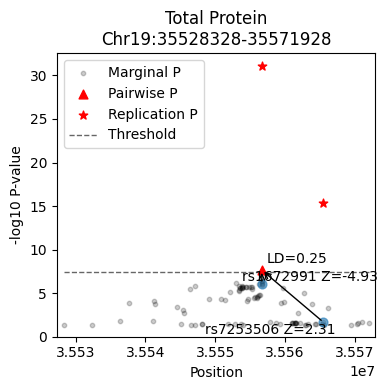

biochemistry_TotalProtein Total Protein
biochemistry_TotalProtein.1368
P-1.0.pw      2.227e-08
P1.pw         8.330e-07
P2.pw         2.114e-02
Z1.pw        -4.927e+00
Z2.pw         2.305e+00
P1_full.pw    8.576e-32
SNP2.pw       rs7253506
LD.pw         2.544e-01
Name: rs1672991, dtype: object
SNP
rs1672991   8.576e-32
rs7253506   4.695e-16
Name: P_full, dtype: float64
distance -8806.0


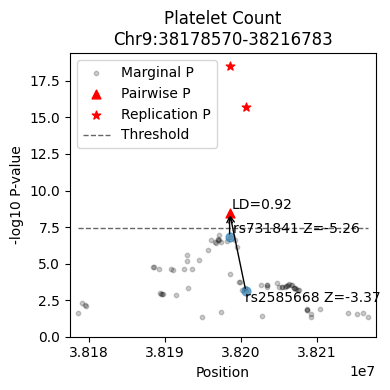

blood_PLATELET_COUNT Platelet Count
blood_PLATELET_COUNT.931
P-1.0.pw      3.366e-09
P1.pw         1.459e-07
P2.pw         7.571e-04
Z1.pw        -5.258e+00
Z2.pw        -3.368e+00
P1_full.pw    2.920e-19
SNP2.pw       rs2585668
LD.pw         9.200e-01
Name: rs731841, dtype: object
SNP
rs731841    2.920e-19
rs2585668   1.956e-16
Name: P_full, dtype: float64
distance -2131.0
Skip blood_RED_COUNT.29


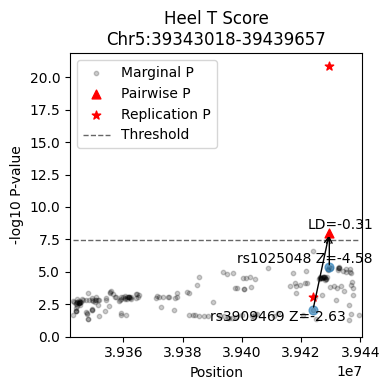

bmd_HEEL_TSCOREz Heel T Score
bmd_HEEL_TSCOREz.519
P-1.0.pw      1.080e-08
P1.pw         4.601e-06
P2.pw         8.437e-03
Z1.pw        -4.582e+00
Z2.pw        -2.634e+00
P1_full.pw    1.337e-21
SNP2.pw       rs3909469
LD.pw        -3.122e-01
Name: rs1025048, dtype: object
SNP
rs1025048   1.337e-21
rs3909469   9.194e-04
Name: P_full, dtype: float64
distance 5506.0
Skip bmd_HEEL_TSCOREz.629
Skip bmd_HEEL_TSCOREz.1549
Skip body_HEIGHTz.25
Skip body_HEIGHTz.1425


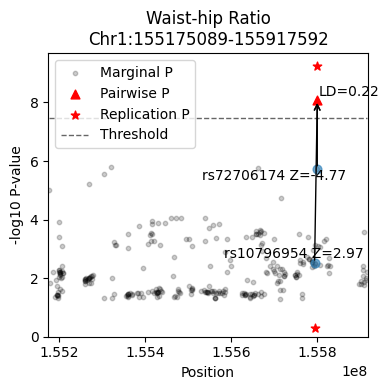

body_WHRadjBMIz Waist-hip Ratio
body_WHRadjBMIz.70
P-1.0.pw       8.403e-09
P1.pw          1.836e-06
P2.pw          3.013e-03
Z1.pw         -4.771e+00
Z2.pw          2.966e+00
P1_full.pw     5.795e-10
SNP2.pw       rs10796954
LD.pw          2.222e-01
Name: rs72706174, dtype: object
SNP
rs72706174   5.795e-10
rs10796954   4.873e-01
Name: P_full, dtype: float64
distance 6201.0


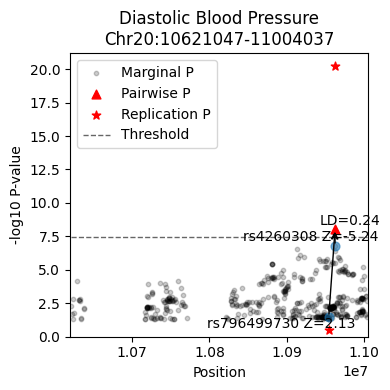

bp_DIASTOLICadjMEDz Diastolic Blood Pressure
bp_DIASTOLICadjMEDz.1574
P-1.0.pw        8.990e-09
P1.pw           1.634e-07
P2.pw           3.317e-02
Z1.pw          -5.237e+00
Z2.pw           2.130e+00
P1_full.pw      6.149e-21
SNP2.pw       rs796499730
LD.pw           2.418e-01
Name: rs4260308, dtype: object
SNP
rs4260308     6.149e-21
rs796499730   2.944e-01
Name: P_full, dtype: float64
distance 8141.0


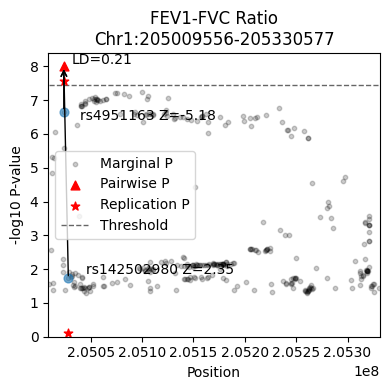

lung_FEV1FVCzSMOKE FEV1-FVC Ratio
lung_FEV1FVCzSMOKE.99
P-1.0.pw        1.005e-08
P1.pw           2.165e-07
P2.pw           1.887e-02
Z1.pw          -5.185e+00
Z2.pw           2.348e+00
P1_full.pw      2.716e-08
SNP2.pw       rs142502980
LD.pw           2.150e-01
Name: rs4951163, dtype: object
SNP
rs4951163     2.716e-08
rs142502980   7.748e-01
Name: P_full, dtype: float64
distance -4465.0


In [12]:
# Masking only pairs 
ind_select = df_assoc_locus['P_combine.sig'] & (~df_assoc_locus['P_min.sig']) & (~df_assoc_locus['nonrep'])
ind_select = ind_select & (df_assoc_locus['argmin_P'] == 'P-1.0')
md_tar = 'P-1.0'

df_tbl_example = []
for trait_locus in df_assoc_locus.index[ind_select]:
    trait,locus = trait_locus.split('.')[0],int(trait_locus.split('.')[1])  
    
    # all pairs tested in the locus
    df_plot_pair = dic_analysis[trait]['pair'].loc[dic_analysis[trait]['pair']['locus']==locus].copy()
    # collapse to single-SNP statistics
    temp_df1 = df_plot_pair[['SNP1', 'CHR', 'BP1', 'P1', 'P1_full']]
    temp_df1.columns = ['SNP', 'CHR', 'BP', 'P', 'P_full']
    temp_df2 = df_plot_pair[['SNP2', 'CHR', 'BP2', 'P2', 'P2_full']]
    temp_df2.columns = ['SNP', 'CHR', 'BP', 'P', 'P_full']
    df_plot_snp = pd.concat([temp_df1, temp_df2], axis=0)
    df_plot_snp = df_plot_snp.drop_duplicates()
    df_plot_snp.sort_values('BP', inplace=True)
    df_plot_snp.index = df_plot_snp['SNP']
    # add pairwise statistics (from top SNP2)
    temp_df = df_plot_pair.loc[df_plot_pair.groupby('SNP1')[md_tar].idxmin()].reset_index(drop=True)
    temp_df.index=temp_df['SNP1']
    temp_df.columns = ['%s.pw'%x for x in temp_df]
    df_plot_snp = df_plot_snp.join(temp_df)
    CHR,BP_min,BP_max = df_plot_snp['CHR'][0], df_plot_snp['BP'].min(), df_plot_snp['BP'].max()
    
    # SNPs discovered using PW test and replicated 
    ind_select = (df_plot_snp['%s.pw'%md_tar]<dic_p_thres_jnt[md_tar]) & (df_plot_snp['P_full']<5e-8)
    # Pick a focal SNP
    if ind_select.sum() == 0:
        print('Skip', trait_locus)
        continue
    SNP1 = df_plot_snp.loc[ind_select, '%s.pw'%md_tar].idxmin()
    SNP2 = df_plot_snp.loc[SNP1, 'SNP2.pw']
    if np.absolute(df_plot_snp.loc[SNP1, 'LD.pw']) < 0.2:
        continue
    
    # Figure 
    plt.figure(figsize=[4,4])
    plt.scatter(df_plot_snp['BP'], -np.log10(df_plot_snp['P']),
                marker='o', color='k', s=10, alpha=0.2, label='Marginal P')    
    plt.scatter(df_plot_snp.loc[[SNP1,SNP2], 'BP'], -np.log10(df_plot_snp.loc[[SNP1,SNP2], 'P']),
                marker='o', color='C0', s=40, alpha=0.6)
    plt.scatter(df_plot_snp.loc[SNP1, 'BP'], -np.log10(df_plot_snp.loc[SNP1, '%s.pw'%md_tar]),
                marker='^', color='r', s=40, label='Pairwise P')
    plt.scatter(df_plot_snp.loc[[SNP1, SNP2], 'BP'], -np.log10(df_plot_snp.loc[[SNP1, SNP2], 'P_full']),
                marker='*', color='r', s=40, label='Replication P')
    
    # Arrows
    plt.annotate(
        "", xy=(df_plot_snp.loc[SNP1, 'BP'], -np.log10(df_plot_snp.loc[SNP1, '%s.pw'%md_tar])), 
        xytext=(df_plot_snp.loc[SNP1, 'BP'], -np.log10(df_plot_snp.loc[SNP1, 'P'])),
        arrowprops=dict(arrowstyle="->", color='k', lw=1, zorder=0)
    ) # SNP1 --> pw
    plt.annotate(
        "", xy=(df_plot_snp.loc[SNP1, 'BP'], -np.log10(df_plot_snp.loc[SNP1, '%s.pw'%md_tar])), 
        xytext=(df_plot_snp.loc[SNP1, 'BP2.pw'], -np.log10(df_plot_snp.loc[SNP1, 'P2.pw'])),
        arrowprops=dict(arrowstyle="->", color='k', lw=1, zorder=0)
    ) # SNP2 --> pw
    
    # annotations
    texts = []
    temp_str = '%s Z=%0.2f' % (SNP1, df_plot_snp.loc[SNP1, 'Z1.pw'])
    texts.append(plt.text(
        df_plot_snp.loc[SNP1, 'BP'], -np.log10(df_plot_snp.loc[SNP1, 'P']), temp_str, fontsize=10
    ))
    temp_str = '%s Z=%0.2f' % (SNP2, df_plot_snp.loc[SNP1, 'Z2.pw'])
    texts.append(plt.text(
        df_plot_snp.loc[SNP2, 'BP'], -np.log10(df_plot_snp.loc[SNP2, 'P']), temp_str, fontsize=10
    ))
    temp_str = 'LD=%0.2f' % df_plot_snp.loc[SNP1, 'LD.pw']
    texts.append(plt.text(
        df_plot_snp.loc[SNP1, 'BP'], -np.log10(df_plot_snp.loc[SNP1, '%s.pw'%md_tar]), temp_str, 
        fontsize=10
    ))
    adjust_text(texts)      
    
    # significance line
    plt.plot([df_plot_snp['BP'].min(), df_plot_snp['BP'].max()], [-np.log10(dic_p_thres_jnt[md_tar])]*2, 
             '--', color='k', zorder=0, alpha=0.6, linewidth=1, label='Threshold')
    # other info
    plt.legend()
    plt.xlim([BP_min-1000, BP_max+1000])
    ymin,ymax = plt.ylim()
    plt.ylim([0, ymax])
    plt.ylabel('-log10 P-value')
    plt.xlabel('Position')
    plt.title('%s\nChr%d:%d-%d' % (DIC_NAME[trait], CHR, BP_min, BP_max))
    plt.tight_layout()
    plt.savefig(FIG_PATH+'/pwassoc.%s.pdf' % trait_locus)
    plt.show()    

    print(trait, DF_TRAIT.loc[trait, 'Trait Name'])
    print(trait_locus)
    with pd.option_context('display.float_format', '{:.3e}'.format):
        print(df_plot_snp.loc[SNP1, ['%s.pw'%md_tar, 'P1.pw', 'P2.pw', 'Z1.pw', 'Z2.pw', 'P1_full.pw', 'SNP2.pw', 'LD.pw']])
        print(df_plot_snp.loc[[SNP1, SNP2], 'P_full'])
    print('distance', df_plot_snp.loc[SNP1, 'BP1.pw']-df_plot_snp.loc[SNP1, 'BP2.pw'])

    # Save plotting information
    if trait_locus in ['biochemistry_TotalProtein.1368', 'bmd_HEEL_TSCOREz.519']:
        temp_ds = df_plot_snp.loc[SNP1, [
            'CHR', 'SNP1.pw', 'BP1.pw', 'P1.pw', 'Z1.pw', 'P1_full.pw', 
            'SNP2.pw', 'BP2.pw', 'LD.pw', 'P2.pw', 'Z2.pw', 'P2_full.pw', '%s.pw'%md_tar,
        ]]
        temp_ds.loc['trait'] = trait
        df_tbl_example.append(temp_ds)

df_tbl_example = pd.concat(df_tbl_example, axis=1).T
df_tbl_example.columns = [
    'CHR', 'SNP1', 'BP1', 'P1', 'Z1', 'P1_full', 
    'SNP2', 'BP2', 'LD', 'P2', 'Z2', 'P2_full', 'P_pw', 'Trait', 
]
df_tbl_example = df_tbl_example[[
    'Trait', 'CHR', 'SNP1', 'BP1', 'P1', 'Z1', 'SNP2', 'BP2', 'P2', 'Z2', 'LD', 'P_pw', 'P1_full', 'P2_full',    
]]
df_tbl_example.to_csv(TAB_PATH+'/pw.example.tsv', sep='\t')